In [142]:
import pandas as pd
import sqlite3
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()

In [143]:
cur.execute("""SELECT *
                FROM Unique_Teams
                ;""")
unique_team_df = pd.DataFrame(cur.fetchall())
unique_team_df.columns = [x[0] for x in cur.description]
unique_team_df.set_index('Unique_Team_ID', inplace = True)
unique_team_df.head()

,TeamName
Unique_Team_ID,
1,Bayern Munich
2,Dortmund
3,Leverkusen
4,RB Leipzig
5,Schalke 04


In [144]:
cur.execute("""SELECT HomeTeam, SUM(FTHG) as Total_Home_Goals
                FROM Matches
                WHERE Season = 2011 and Div != 'E0'
                GROUP BY HomeTeam
                 ;""")
team_goals_home_df = pd.DataFrame(cur.fetchall())
team_goals_home_df.columns = [x[0] for x in cur.description]
team_goals_home_df.head()

,HomeTeam,Total_Home_Goals
0,Aachen,15
1,Augsburg,20
2,Bayern Munich,49
3,Bochum,23
4,Braunschweig,21


In [145]:
cur.execute("""SELECT AwayTeam, SUM(FTAG) as Total_Away_Goals
                FROM Matches
                WHERE Season = 2011 and Div != 'E0'
                GROUP BY AwayTeam
                 ;""")
team_goals_away_df = pd.DataFrame(cur.fetchall())
team_goals_away_df.columns = [x[0] for x in cur.description]
team_goals_away_df.head()

,AwayTeam,Total_Away_Goals
0,Aachen,15
1,Augsburg,16
2,Bayern Munich,28
3,Bochum,18
4,Braunschweig,16


In [146]:
Home_Away_Goals = pd.concat([team_goals_away_df, team_goals_home_df], axis = 1)
Home_Away_Goals.drop(['HomeTeam'], axis = 1, inplace =True)
Home_Away_Goals.rename(columns = {'AwayTeam': 'Team_Name'}, inplace = True)
Home_Away_Goals.head()

,Team_Name,Total_Away_Goals,Total_Home_Goals
0,Aachen,15,15
1,Augsburg,16,20
2,Bayern Munich,28,49
3,Bochum,18,23
4,Braunschweig,16,21


In [147]:
Home_Away_Goals['Total_Goals'] = Home_Away_Goals['Total_Away_Goals'] + Home_Away_Goals['Total_Home_Goals']
Home_Away_Goals.head()

,Team_Name,Total_Away_Goals,Total_Home_Goals,Total_Goals
0,Aachen,15,15,30
1,Augsburg,16,20,36
2,Bayern Munich,28,49,77
3,Bochum,18,23,41
4,Braunschweig,16,21,37


In [148]:
cur.execute("""SELECT HomeTeam, COUNT(FTR) as Home_Win
                FROM Matches
                WHERE Season = 2011 and FTR = 'H' and Div != 'E0'
                GROUP BY HomeTeam
                ;""")
home_wins_df = pd.DataFrame(cur.fetchall())
home_wins_df.columns = [x[0] for x in cur.description]
home_wins_df.head()

,HomeTeam,Home_Win
0,Aachen,4
1,Augsburg,6
2,Bayern Munich,14
3,Bochum,7
4,Braunschweig,6


In [149]:
cur.execute("""SELECT AwayTeam, COUNT(FTR) as Away_Win
                FROM Matches
                WHERE Season = 2011 and FTR = 'A'and Div != 'E0'
                GROUP BY AwayTeam
                ;""")
away_wins_df = pd.DataFrame(cur.fetchall())
away_wins_df.columns = [x[0] for x in cur.description]
away_wins_df.head()

,AwayTeam,Away_Win
0,Aachen,2
1,Augsburg,2
2,Bayern Munich,9
3,Bochum,3
4,Braunschweig,4


In [150]:
total_wins = pd.concat([away_wins_df, home_wins_df], axis = 1)
total_wins.drop(['HomeTeam'], axis = 1, inplace =True)
total_wins.rename(columns = {'AwayTeam': 'Team_Name'}, inplace = True)
total_wins.head()

,Team_Name,Away_Win,Home_Win
0,Aachen,2,4
1,Augsburg,2,6
2,Bayern Munich,9,14
3,Bochum,3,7
4,Braunschweig,4,6


In [151]:
total_wins['Total_Wins'] = total_wins['Away_Win'] + total_wins['Home_Win']
total_wins.head()

,Team_Name,Away_Win,Home_Win,Total_Wins
0,Aachen,2,4,6
1,Augsburg,2,6,8
2,Bayern Munich,9,14,23
3,Bochum,3,7,10
4,Braunschweig,4,6,10


In [152]:
cur.execute("""SELECT distinct HomeTeam,   
                CASE
                WHEN FTR = 'A' THEN SUM(FTAG)
                WHEN FTR = 'H' THEN SUM(FTHG)
                WHEN FTR = 'D' THEN SUM(FTAG)
                ELSE 0 END AS "Total goals"
                ,SUM(CASE WHEN FTR = 'H' then 1 else 0 end) "Home_Wins"
                ,SUM(CASE WHEN FTR = 'A' then 1 ELSE 0 END) "Home_Losses"
                FROM matches
                WHERE season = 2011 and Div != 'E0'
                GROUP BY 1 
                ORDER BY 1
                ;""")
total_wins_loss = pd.DataFrame(cur.fetchall())
total_wins_loss.columns = [x[0] for x in cur.description]
total_wins_loss.head()

,HomeTeam,Total goals,Home_Wins,Home_Losses
0,Aachen,24,4,7
1,Augsburg,19,6,4
2,Bayern Munich,6,14,2
3,Bochum,23,7,7
4,Braunschweig,15,6,3


In [153]:
cur.execute("""SELECT distinct AwayTeam,   
                CASE
                WHEN FTR = 'A' THEN SUM(FTAG)
                WHEN FTR = 'H' THEN SUM(FTHG)
                WHEN FTR = 'D' THEN SUM(FTAG)
                ELSE 0 END AS "Total goals"
                ,SUM(CASE WHEN FTR = 'A' then 1 else 0 end) "Away_Wins"
                ,SUM(CASE WHEN FTR = 'H' then 1 ELSE 0 END) "Away_Losses"
                FROM matches
                WHERE season = 2011 and Div != 'E0'
                GROUP BY 1 
                ORDER BY 1
                ;""")
total_wins_loss_away = pd.DataFrame(cur.fetchall())
total_wins_loss_away.columns = [x[0] for x in cur.description]
total_wins_loss_away.head()

,AwayTeam,Total goals,Away_Wins,Away_Losses
0,Aachen,23,2,8
1,Augsburg,30,2,8
2,Bayern Munich,28,9,5
3,Bochum,32,3,10
4,Braunschweig,20,4,6


In [154]:
big_df = pd.concat([total_wins_loss, total_wins_loss_away, Home_Away_Goals], axis = 1)
big_df.drop(['AwayTeam', 'Total goals', 'Total_Away_Goals', 'Total_Home_Goals', 'HomeTeam'], axis = 1, inplace =True)
big_df.head()

,Home_Wins,Home_Losses,Away_Wins,Away_Losses,Team_Name,Total_Goals
0,4,7,2,8,Aachen,30
1,6,4,2,8,Augsburg,36
2,14,2,9,5,Bayern Munich,77
3,7,7,3,10,Bochum,41
4,6,3,4,6,Braunschweig,37


In [155]:
big_df['Total_Wins'] = big_df['Away_Wins'] + big_df['Home_Wins']
big_df['Total_Losses'] = big_df['Home_Losses'] + big_df['Away_Losses']
big_df.head()

,Home_Wins,Home_Losses,Away_Wins,Away_Losses,Team_Name,Total_Goals,Total_Wins,Total_Losses
0,4,7,2,8,Aachen,30,6,15
1,6,4,2,8,Augsburg,36,8,12
2,14,2,9,5,Bayern Munich,77,23,7
3,7,7,3,10,Bochum,41,10,17
4,6,3,4,6,Braunschweig,37,10,9


In [156]:
big_df.drop(['Home_Wins', 'Home_Losses', 'Away_Wins', 'Away_Losses'], axis = 1, inplace = True)
big_df.head()

,Team_Name,Total_Goals,Total_Wins,Total_Losses
0,Aachen,30,6,15
1,Augsburg,36,8,12
2,Bayern Munich,77,23,7
3,Bochum,41,10,17
4,Braunschweig,37,10,9


# MAKE HISTOGRAM FOR EACH GERMAN TEAM WINS AND LOSSES

In [157]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Teams')

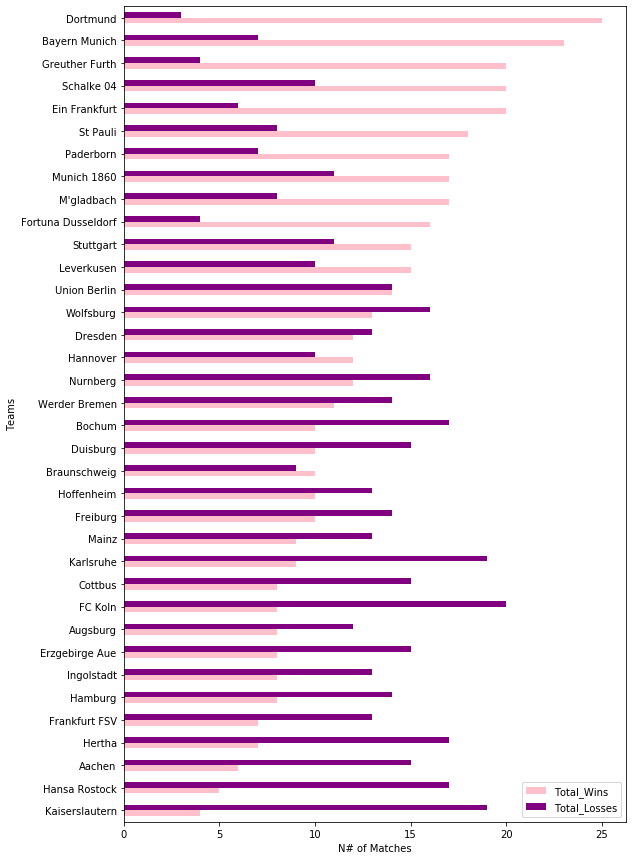

In [158]:
big_df_two = big_df.sort_values(['Total_Wins'], ascending = True)
big_df_two.plot.barh(x = 'Team_Name', y = ['Total_Wins', 'Total_Losses'], color = ['pink', 'purple'],
                        figsize = (9,15))
plt.xlabel('N# of Matches')
plt.ylabel('Teams')



# USE DARKSKY API TO FIND WEATHER ON MATCH DAYS.

In [159]:
%reload_ext autoreload
%autoreload 2
import requests
from lib import MongoHandler, WeatherGetter
import json
import pandas as pd
import numpy as np
import sqlite3
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()
import lib 

In [160]:
cur.execute ("""SELECT Date
                FROM Matches
                WHERE SEASON = 2011 
                ;""")
match_dates_df= pd.DataFrame(cur.fetchall())
match_dates_df.columns = [x[0] for x in cur.description]
match_dates_df.head()
#992 rows × 1 columns

,Date
0,2012-03-31
1,2011-12-11
2,2011-08-13
3,2011-11-27
4,2012-02-18


In [161]:
unique_match_dates_df = match_dates_df.drop_duplicates()
unique_match_dates_df.head()
#165 rows × 1 columns

,Date
0,2012-03-31
1,2011-12-11
2,2011-08-13
3,2011-11-27
4,2012-02-18


In [162]:
time = 'T20:00:00'
dates_with_time_df = unique_match_dates_df.Date.map(lambda x: f"{x}{time}")

In [163]:
list_dates_with_time_df = list(dates_with_time_df)

In [164]:
get_weather = WeatherGetter()

weather_dicts = {}

for date in list_dates_with_time_df:
    call = get_weather.weather_getter(date)
    result = call.json()
    
    weather_dicts[date] = result['currently'].get('icon') if result['currently'].get('icon') else result['currently'].get('summary')

In [165]:
new_weather_dict = {}
for i in weather_dicts:
    new_weather_dict[i[:10]] = weather_dicts[i]

In [166]:
weather_date_df = pd.DataFrame.from_dict(new_weather_dict, orient = 'index')
weather_date_df.head()

,0
2012-03-31,partly-cloudy-night
2011-12-11,Clear
2011-08-13,Clear
2011-11-27,partly-cloudy-night
2012-02-18,partly-cloudy-night


In [167]:
weather_date_df.rename(columns = {0 : 'Weather'}, inplace = True)

In [168]:
weather_date_df.groupby('Weather').count()

""
Weather
Clear
clear-day
clear-night
cloudy
fog
partly-cloudy-day
partly-cloudy-night
rain
wind


In [169]:
weather_date_df.reset_index(inplace = True)
weather_date_df.head()

,index,Weather
0,2012-03-31,partly-cloudy-night
1,2011-12-11,Clear
2,2011-08-13,Clear
3,2011-11-27,partly-cloudy-night
4,2012-02-18,partly-cloudy-night


In [170]:
weather_date_df.groupby('Weather').count()

,index
Weather,
Clear,68
clear-day,3
clear-night,7
cloudy,2
fog,1
partly-cloudy-day,10
partly-cloudy-night,59
rain,14
wind,1


In [171]:
rain_dates = weather_date_df.loc[weather_date_df['Weather'] == 'rain']
rain_dates

,index,Weather
8,2011-09-18,rain
12,2011-08-27,rain
20,2012-01-22,rain
21,2011-12-03,rain
46,2011-07-17,rain
67,2011-12-16,rain
98,2011-09-11,rain
103,2011-08-14,rain
106,2011-08-08,rain
112,2011-08-12,rain


In [177]:
rains_df = rain_dates.rename(columns={'index': 'Date'})

In [178]:
rain_dates.to_csv('Rain_Dates.csv')

In [179]:
cur.execute("""SELECT Date, HomeTeam, AwayTeam, FTR 
                FROM matches
                WHERE Season = '2011' and Div != 'E0'
                ;""")
german_match_days = pd.DataFrame(cur.fetchall())
german_match_days.columns = [x[0] for x in cur.description]
german_match_days.head()

,Date,HomeTeam,AwayTeam,FTR
0,2012-03-31,Nurnberg,Bayern Munich,A
1,2011-12-11,Stuttgart,Bayern Munich,A
2,2011-08-13,Wolfsburg,Bayern Munich,A
3,2011-11-27,Mainz,Bayern Munich,H
4,2012-02-18,Freiburg,Bayern Munich,D


In [184]:
#merge rain dates and with match dates and make new dataframe
rain_matches_df = pd.merge(left = rain_dates, right = german_match_days, left_on = 'Date', right_on = 'Date')
rain_matches_df.head()

,Date,Weather,HomeTeam,AwayTeam,FTR
0,2011-09-18,rain,Schalke 04,Bayern Munich,A
1,2011-09-18,rain,Hannover,Dortmund,H
2,2011-09-18,rain,Aachen,Greuther Furth,D
3,2011-09-18,rain,Bochum,Paderborn,A
4,2011-09-18,rain,Munich 1860,Frankfurt FSV,H


In [200]:
import pandas as pd 
import sqlite3
conn = sqlite3.connect('database.sqlite')
cur = conn.cursor()
pysqldf = lambda q: sqldf(q, globals())

In [201]:
Home_Wins = []
Win = 1
Draw_Loss = 0
for result in list(rain_matches_df.FTR):
    if result == 'H':
        Home_Wins.append(Win) 
    elif result == 'D' or 'A':
        Home_Wins.append(Draw_Loss)
len(Home_Wins)


47

In [206]:
Away_Wins = []
Win = 1
Draw_Loss = 0
for result in list(rain_matches_df.FTR):
    if result == 'H':
        Away_Wins.append(Win) 
    elif result == 'D' or 'A':
        Away_Wins.append(Draw_Loss)
len(Away_Wins)

47

In [208]:
Home_Wins_2011 = pd.Series(Home_Wins)
Away_Wins_2011 = pd.Series(Away_Wins)
rain_matches_df.insert(loc= 5, column = 'HomeWins 2011', value = Home_Wins_2011 )
rain_matches_df.insert(loc= 6, column = 'AwayWins 2011', value = Away_Wins_2011 )
rain_matches_df.head()

,Date,Weather,HomeTeam,AwayTeam,FTR,HomeWins 2011,AwayWins 2011,Home Wins 2011,Aqay Wins 2011
0,2011-09-18,rain,Schalke 04,Bayern Munich,A,0,0,0,0
1,2011-09-18,rain,Hannover,Dortmund,H,1,1,1,1
2,2011-09-18,rain,Aachen,Greuther Furth,D,0,0,0,0
3,2011-09-18,rain,Bochum,Paderborn,A,0,0,0,0
4,2011-09-18,rain,Munich 1860,Frankfurt FSV,H,1,1,1,1


In [211]:
h_rain = rain_matches_df.groupby(by='HomeTeam')['HomeWins 2011'].agg(['sum','count'])
a_rain = rain_matches_df.groupby(by ='AwayTeam')['AwayWins 2011'].agg(['sum', 'count'])

In [212]:
rain_stats_merged = h_rain.join(a_rain, how = 'outer', lsuffix = '_home', rsuffix = '_away')

In [214]:
rain_stats_merged

,sum_home,count_home,sum_away,count_away
Aachen,0.0,2.0,NaN,NaN
Augsburg,NaN,NaN,1.0,2.0
Bayern Munich,2.0,2.0,0.0,2.0
Bochum,1.0,3.0,0.0,1.0
Braunschweig,1.0,1.0,0.0,1.0
Cottbus,NaN,NaN,0.0,1.0
Dortmund,NaN,NaN,1.0,4.0
Dresden,1.0,1.0,NaN,NaN
Duisburg,0.0,2.0,1.0,1.0
Ein Frankfurt,1.0,1.0,NaN,NaN


In [215]:
rain_stats_merged.fillna(value = 0, inplace=True)

In [216]:
rain_stats_merged.head()

,sum_home,count_home,sum_away,count_away
Aachen,0.0,2.0,0.0,0.0
Augsburg,0.0,0.0,1.0,2.0
Bayern Munich,2.0,2.0,0.0,2.0
Bochum,1.0,3.0,0.0,1.0
Braunschweig,1.0,1.0,0.0,1.0
